In [9]:
import os
import wave
import matplotlib.pyplot as plt
import numpy as np
import cv2
import shutil
%matplotlib inline

In [ ]:
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = np.fromstring(frames, 'Int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

In [26]:
def make_video(images, outvid=None, fps=24, size=None, is_color=True, format="XVID"):
    from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
    fourcc = VideoWriter_fourcc(*format)
    vid = None
    for image in images:
        if not os.path.exists(image):
            raise FileNotFoundError(image)
        img = imread(image)
        if vid is None:
            if size is None:
                size = img.shape[1], img.shape[0]
            vid = VideoWriter(outvid, fourcc, float(fps), size, is_color)
        if size[0] != img.shape[1] and size[1] != img.shape[0]:
            img = resize(img, size)
        vid.write(img)
    vid.release()
    return vid

In [31]:
def make_imgs(sound_file):
    direc = sound_file.split('.')[0] + '_tmp'
    if os.path.exists(direc):
        shutil.rmtree(direc)
    os.mkdir(direc)
    sound_info, frame_rate = get_wav_info(sound_file)
    plt.figure(num=None, figsize=(22, 4))
    plt.subplot(111)
    plt.title(sound_file)
    plt.specgram(sound_info, Fs=frame_rate)
    dur = plt.xlim()[1]
    x = dur/(dur*24)
    while x <= dur:
        plt.figure(num=None, figsize=(22, 4))
        plt.subplot(111)
        plt.title(sound_file)
        plt.specgram(sound_info, Fs=frame_rate)
        plt.plot([x, x], [0, plt.ylim()[1]], 'red')
        plt.savefig(direc + '/' + str(x) + '.png')
        plt.close()
        x += dur/(dur*24)

In [39]:
def spec_video(file):
    fname = file.split('.')[0]
    make_imgs(file)
    fls = []
    for f in os.listdir(fname + '_tmp'):
        fls.append(fname + '_tmp/' + f)
    make_video(fls, outvid=fname + '_tmp.avi')
    os.system('ffmpeg -i ' + fname + '_tmp.avi -i ' + file + ' ' + fname + '.mp4')
    shutil.rmtree(fname + '_tmp')
    os.remove(fname + '_tmp.avi')

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # This is added back by InteractiveShellApp.init_path()


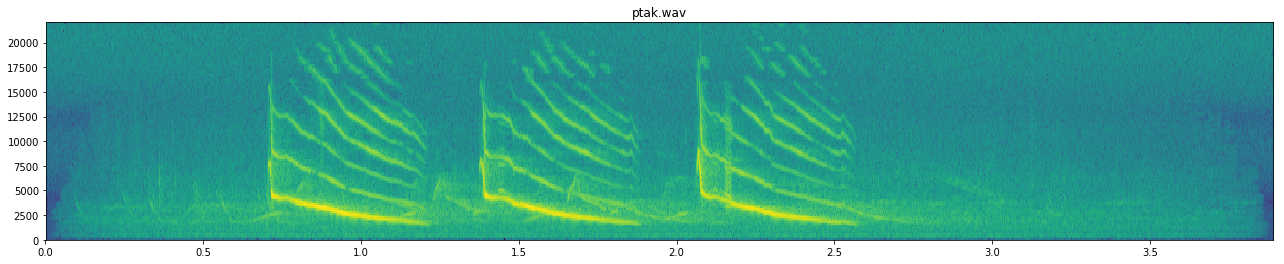

In [40]:
spec_video('ptak.wav')